# Reading Dataset

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [39]:
import pandas as pd
df =pd.read_csv('NFL.csv')

# Categorical and Numerical Features

In [40]:
# Categorical and Numerical Features

numeric=[]
category=[]

for col in df.columns:
  if(df[col].dtypes != 'O'):
    numeric.append(col)
  else:
    category.append(col)

print("Numerical Features :")
print(numeric)
print("Categorical Features :")
print(category)

Numerical Features :
['Unnamed: 0', 'Age', 'G', 'GS', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate', 'Sk', 'Yds-s', 'Sk%', 'NY/A', 'ANY/A', 'Year']
Categorical Features :
['Player']


# Missing values with missing rates

In [41]:
# Missing values with missing rates

NULL=[]

for col in df.columns:
  x = df[col].isnull().sum()
  y = len(df[col])
  print("column:  ",col)
  print("Missing Values = ",x)
  print("Total Values = ",y)
  print("Missing Rates = ",((x/y)*100),"%")
  print()

column:   Unnamed: 0
Missing Values =  0
Total Values =  2350
Missing Rates =  0.0 %

column:   Player
Missing Values =  0
Total Values =  2350
Missing Rates =  0.0 %

column:   Age
Missing Values =  0
Total Values =  2350
Missing Rates =  0.0 %

column:   G
Missing Values =  0
Total Values =  2350
Missing Rates =  0.0 %

column:   GS
Missing Values =  0
Total Values =  2350
Missing Rates =  0.0 %

column:   Cmp
Missing Values =  0
Total Values =  2350
Missing Rates =  0.0 %

column:   Att
Missing Values =  0
Total Values =  2350
Missing Rates =  0.0 %

column:   Cmp%
Missing Values =  0
Total Values =  2350
Missing Rates =  0.0 %

column:   Yds
Missing Values =  0
Total Values =  2350
Missing Rates =  0.0 %

column:   TD
Missing Values =  0
Total Values =  2350
Missing Rates =  0.0 %

column:   TD%
Missing Values =  0
Total Values =  2350
Missing Rates =  0.0 %

column:   Int
Missing Values =  0
Total Values =  2350
Missing Rates =  0.0 %

column:   Int%
Missing Values =  0
Total Valu

In [42]:
df.head(20)

,Unnamed: 0,Player,Age,G,GS,Cmp,Att,Cmp%,Yds,TD,...,AY/A,Y/C,Y/G,Rate,Sk,Yds-s,Sk%,NY/A,ANY/A,Year
0,0,Kurt Warner,30,16,16,375,546,68.7,4830,36,...,8.4,12.9,301.9,101.4,38,233,6.5,7.87,7.41,2001
1,1,Peyton Manning,25,16,16,343,547,62.7,4131,26,...,6.6,12.0,258.2,84.1,29,232,5.0,6.77,5.88,2001
2,2,Brett Favre,32,16,16,314,510,61.6,3921,32,...,7.6,12.5,245.1,94.1,22,151,4.1,7.09,7.02,2001
3,3,Aaron Brooks,25,16,16,312,558,55.9,3832,26,...,6.0,12.3,239.5,76.4,50,330,8.2,5.76,4.99,2001
4,4,Rich Gannon,36,16,16,361,549,65.8,3828,27,...,7.2,10.6,239.3,95.5,27,155,4.7,6.38,6.61,2001
5,5,Trent Green,31,16,16,296,523,56.6,3783,17,...,5.8,12.8,236.4,71.1,39,198,6.9,6.38,5.06,2001
6,6,Kerry Collins,29,16,16,327,568,57.6,3764,19,...,6.0,11.5,235.3,77.1,36,206,6.0,5.89,5.33,2001
7,7,Jake Plummer,27,16,16,304,525,57.9,3653,18,...,6.4,12.0,228.3,79.6,29,204,5.2,6.23,5.74,2001
8,8,Jeff Garcia,31,16,16,316,504,62.7,3538,32,...,7.2,11.2,221.1,94.8,26,114,4.9,6.46,6.65,2001
9,9,Doug Flutie,39,16,16,294,521,56.4,3464,15,...,5.7,11.8,216.5,72.0,25,168,4.6,6.04,5.10,2001


# Histogram

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/tools.py:227: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(**fig_kw)


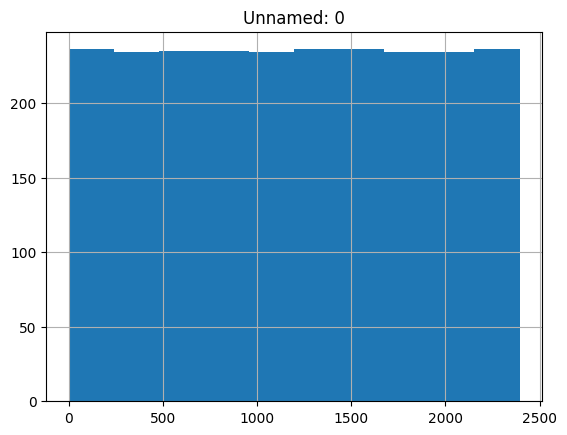

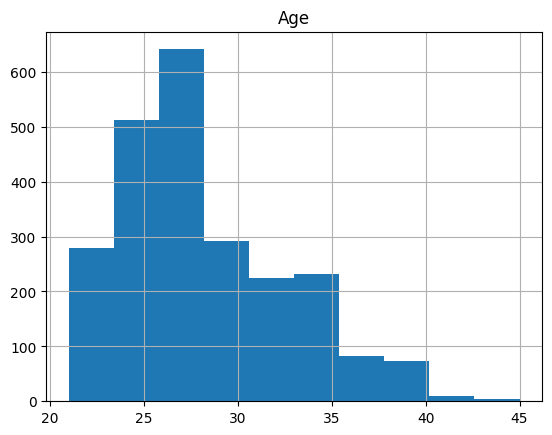

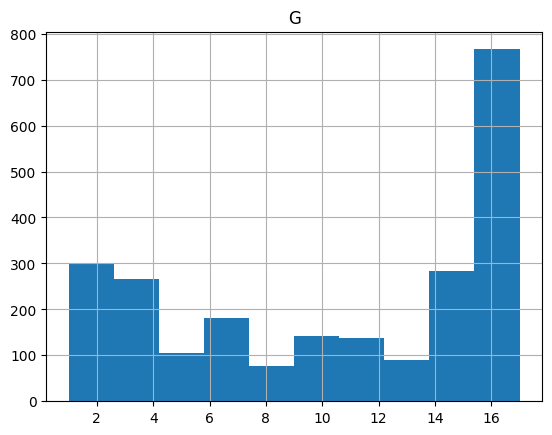

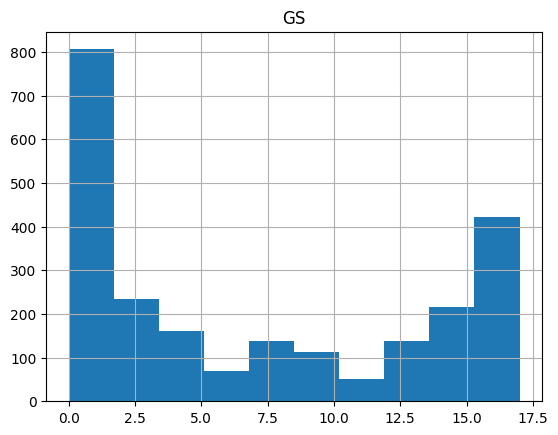

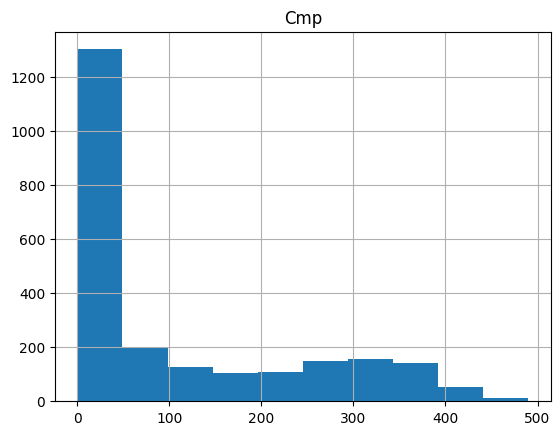

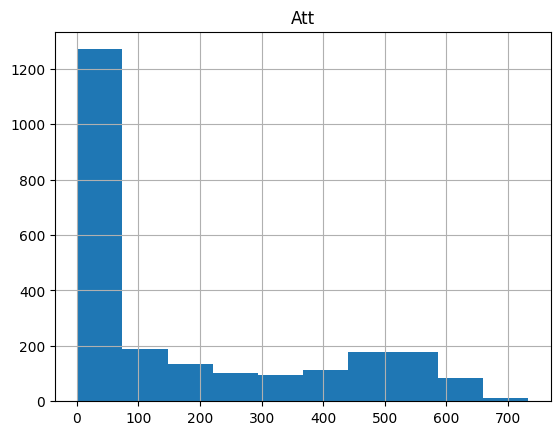

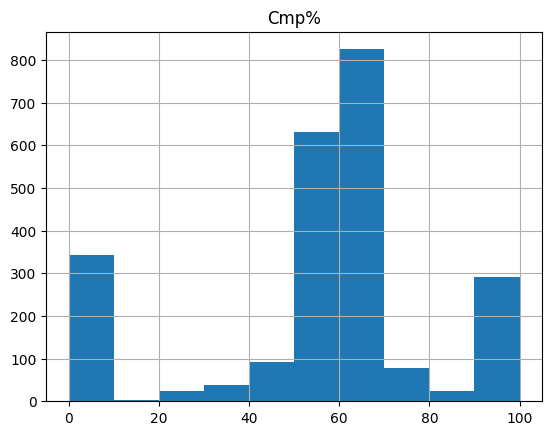

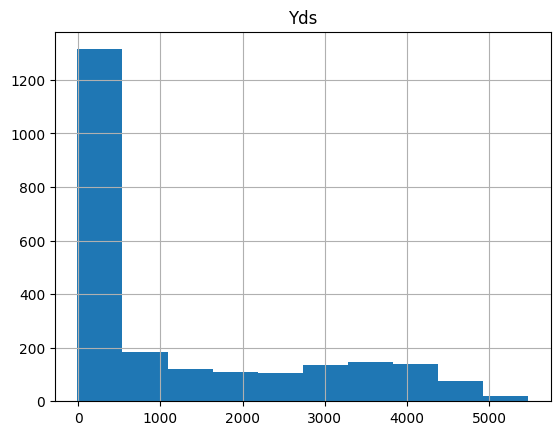

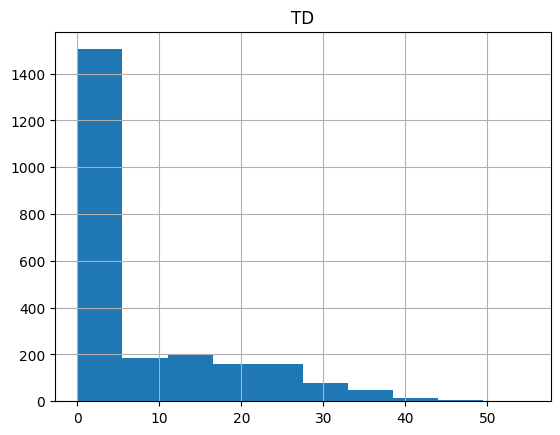

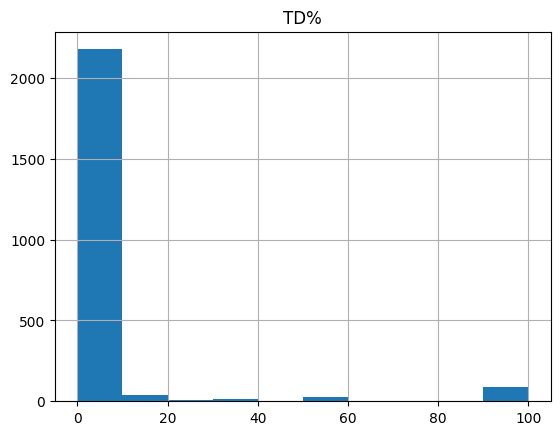

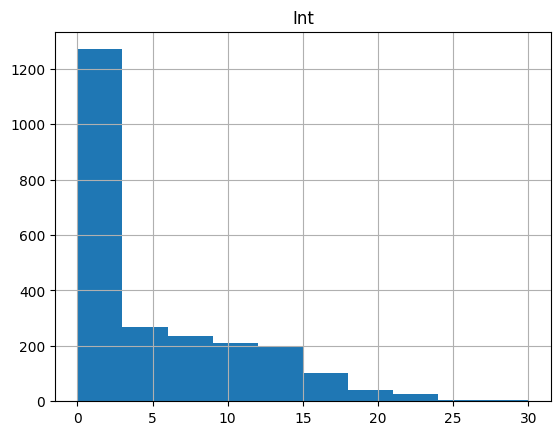

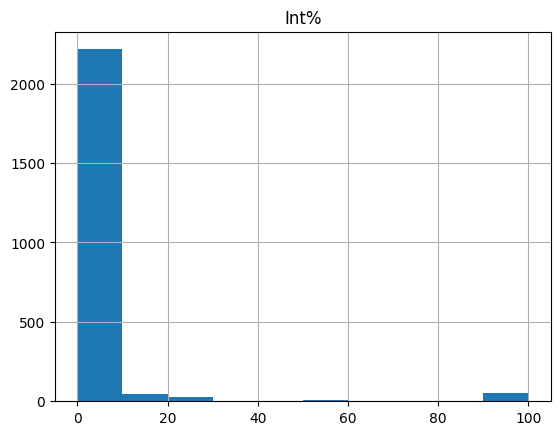

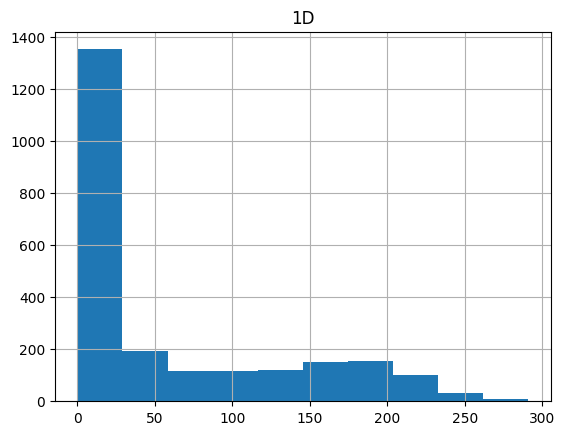

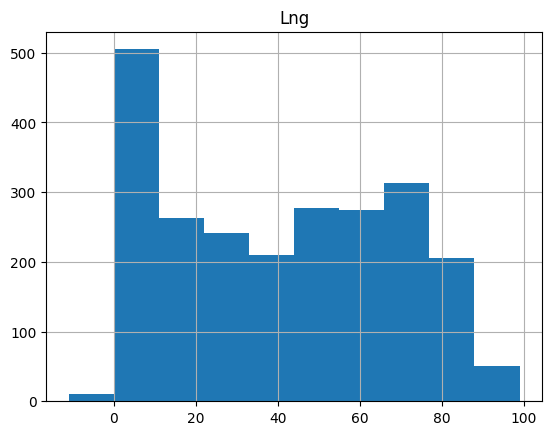

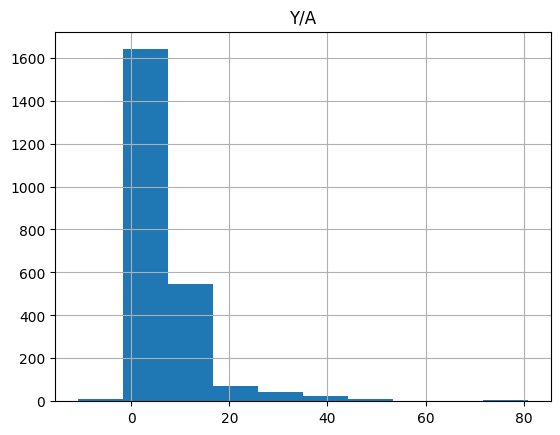

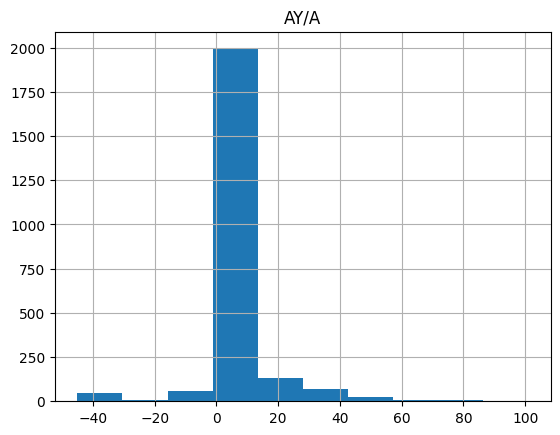

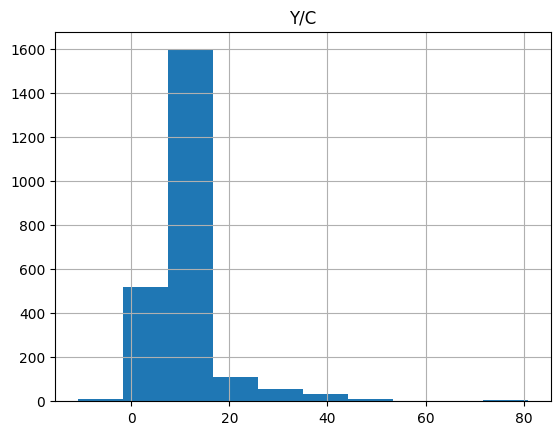

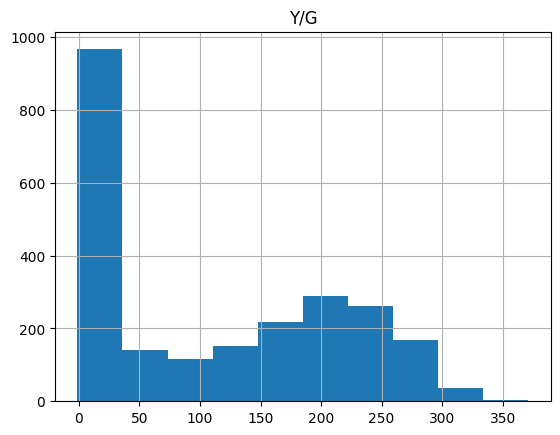

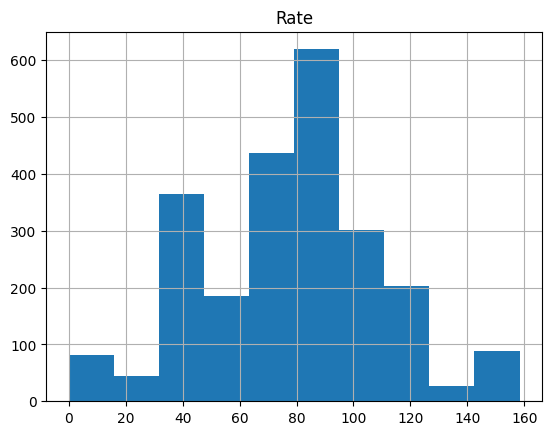

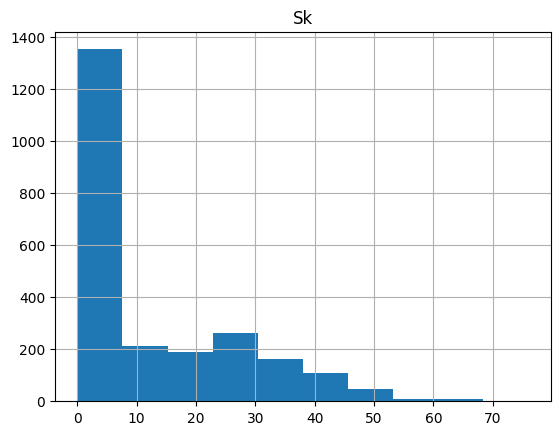

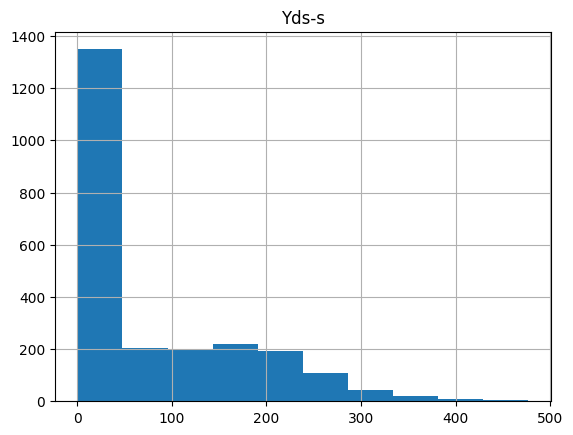

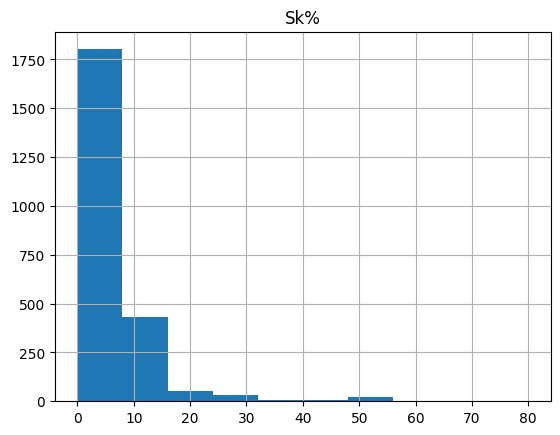

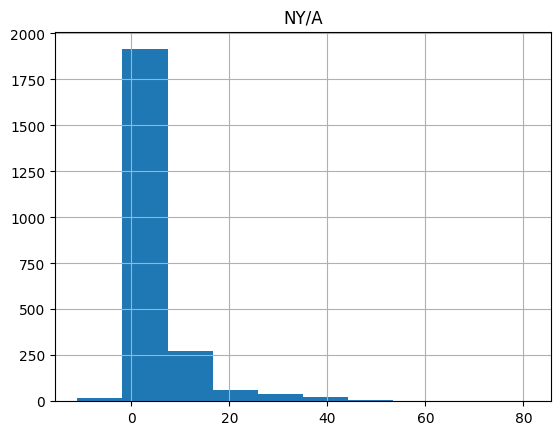

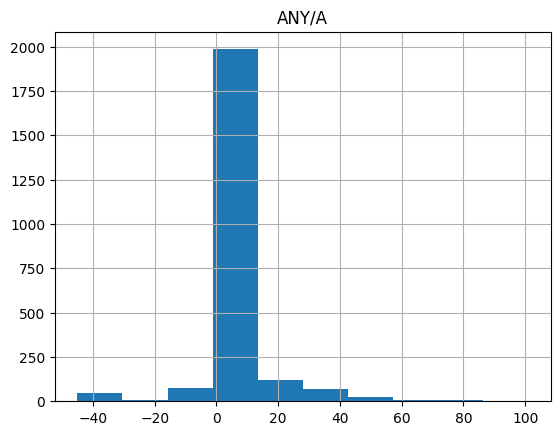

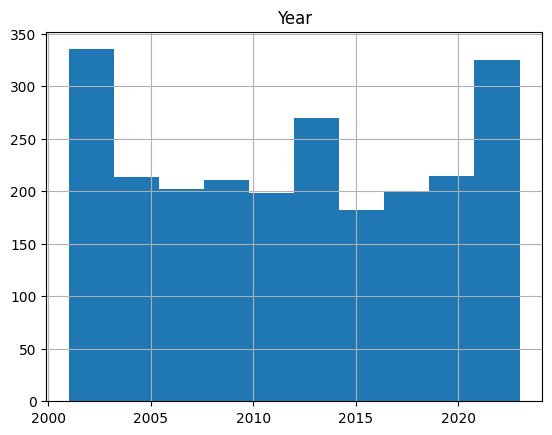

In [43]:
# Histogram

for col in df.columns:
  if(df[col].dtypes !='O'):
    df.hist(column= col)

# Probability Distribution

Probability Distribution


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


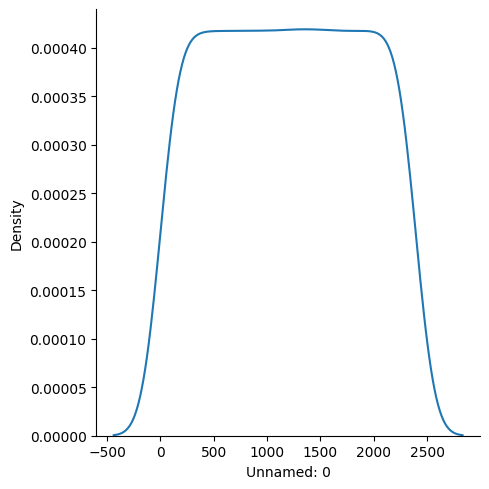

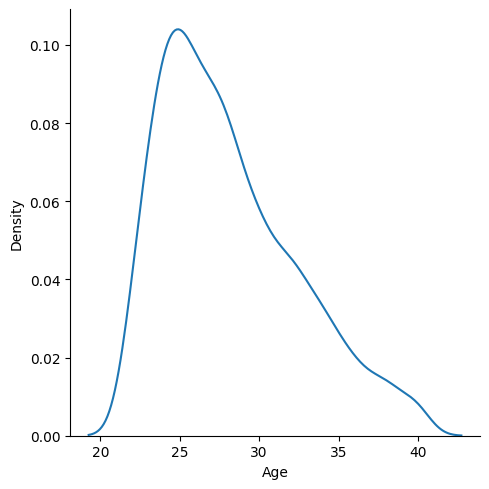

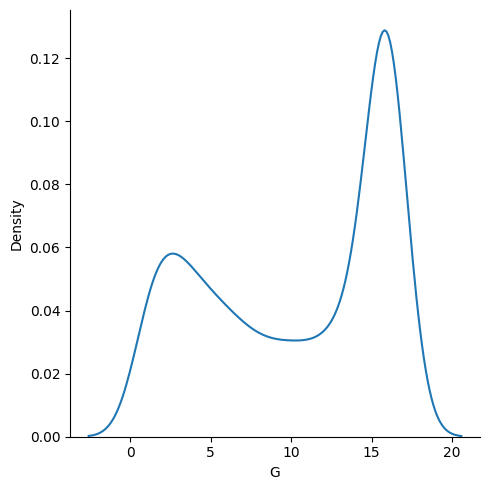

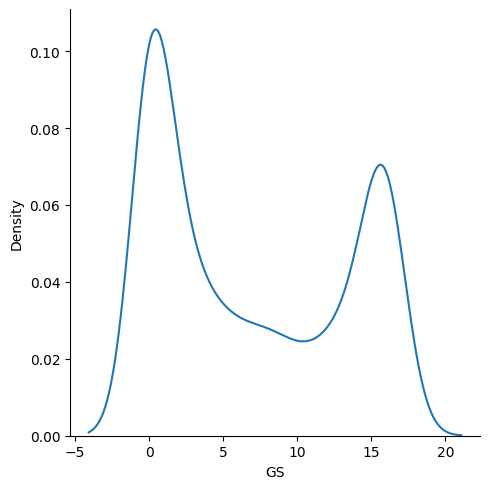

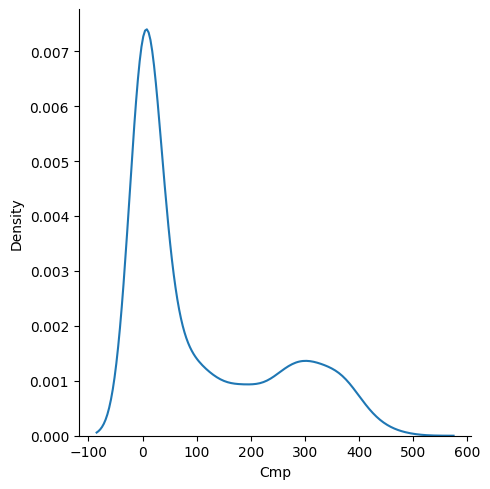

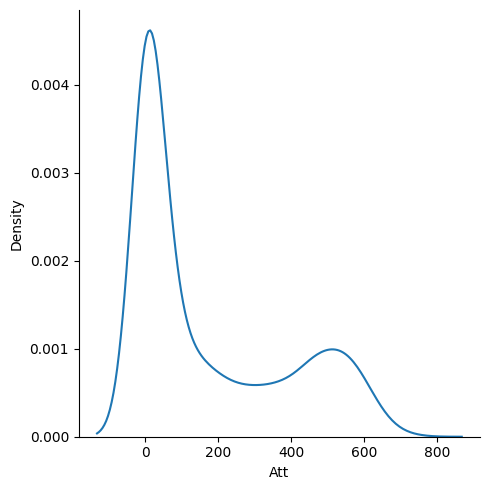

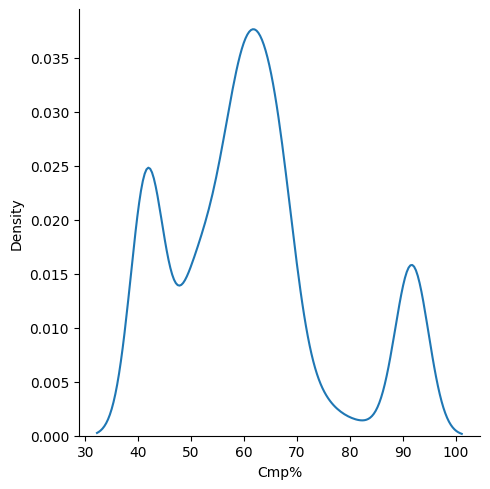

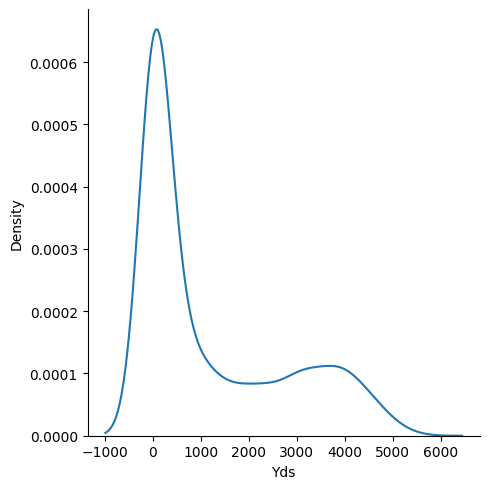

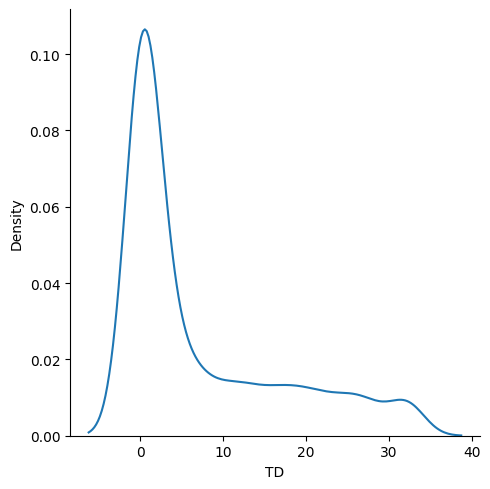

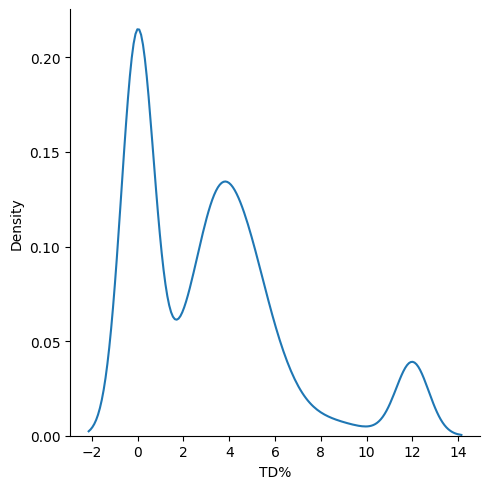

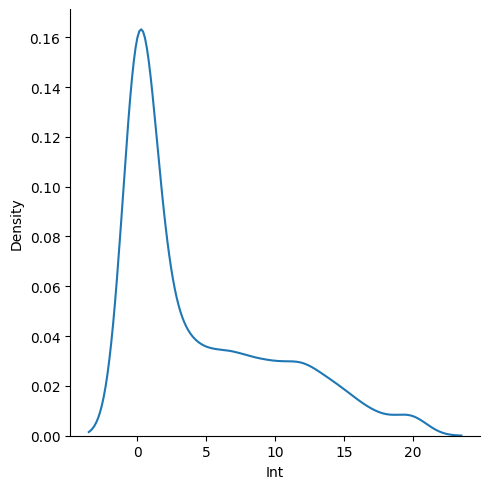

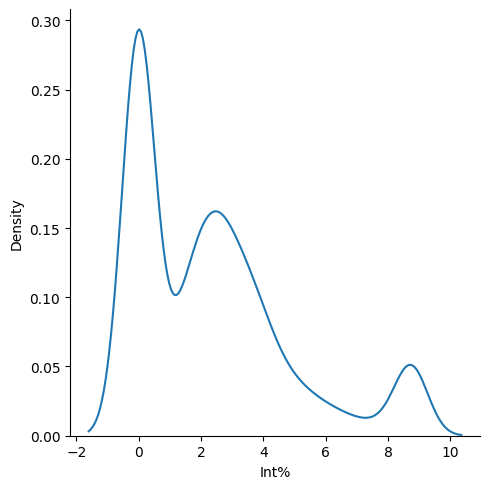

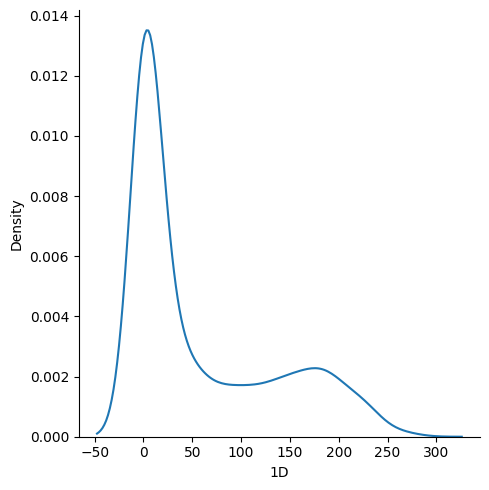

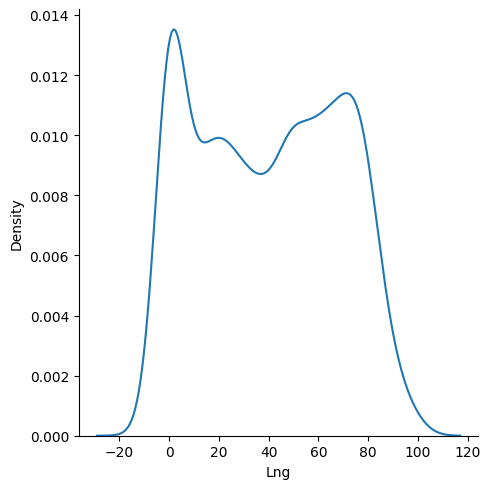

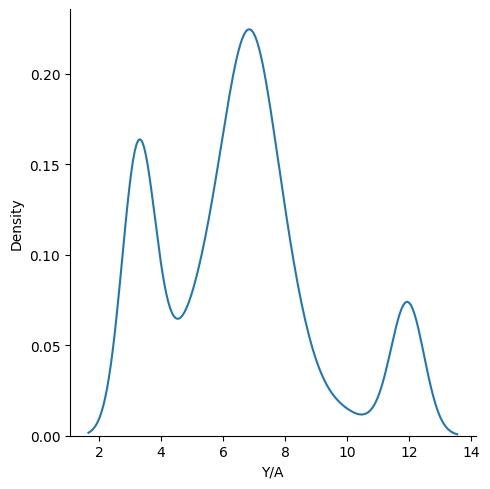

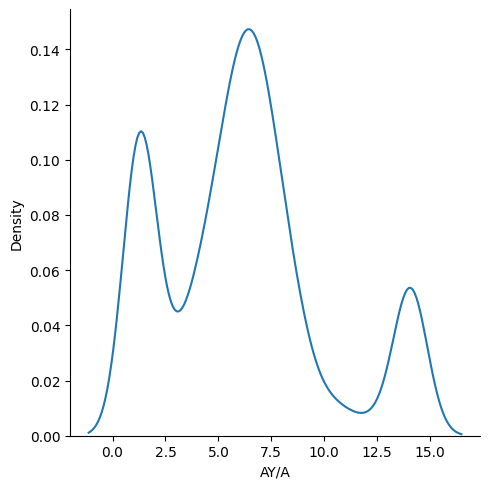

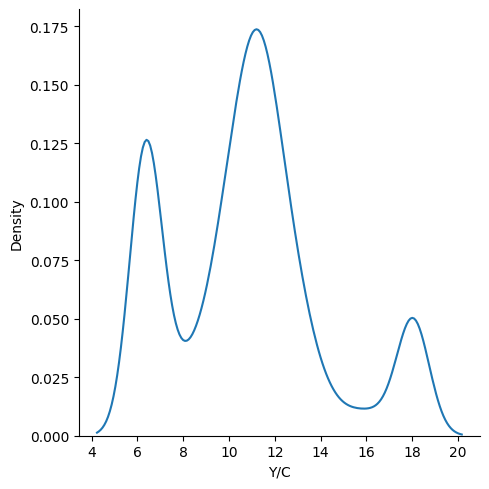

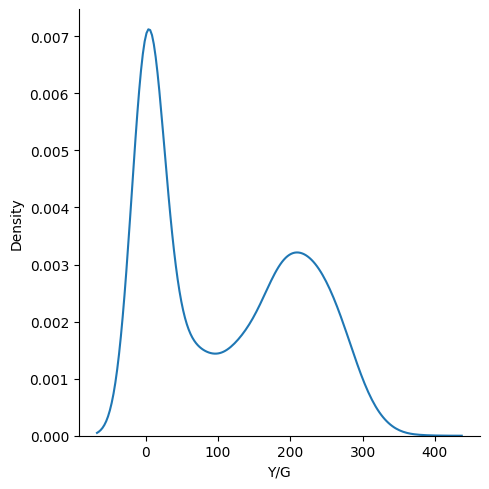

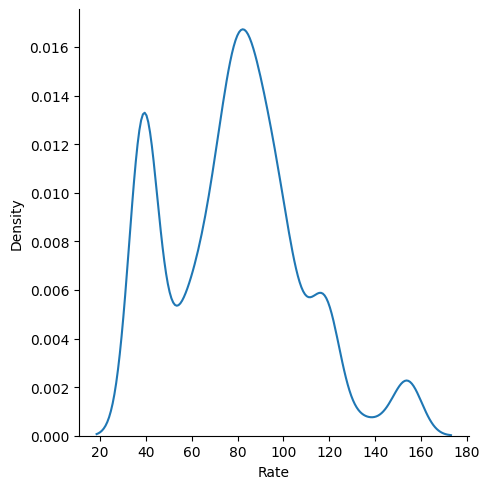

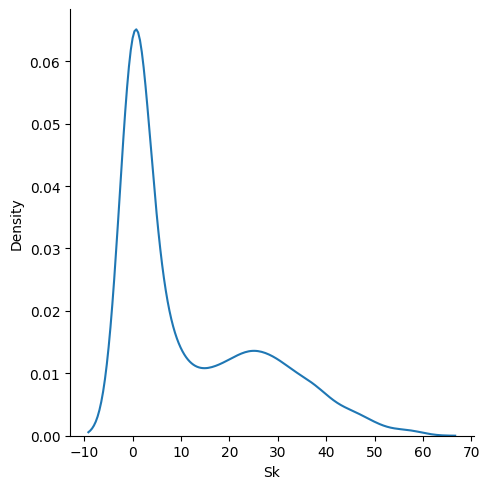

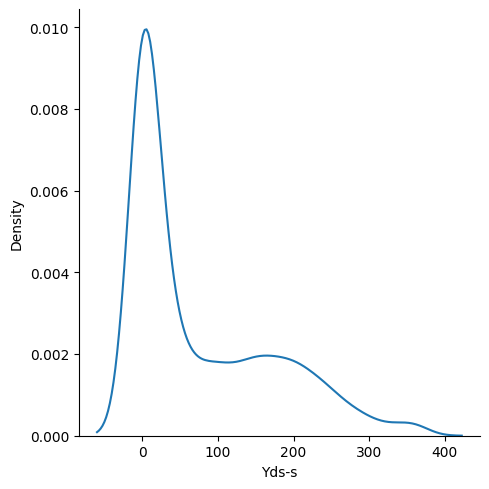

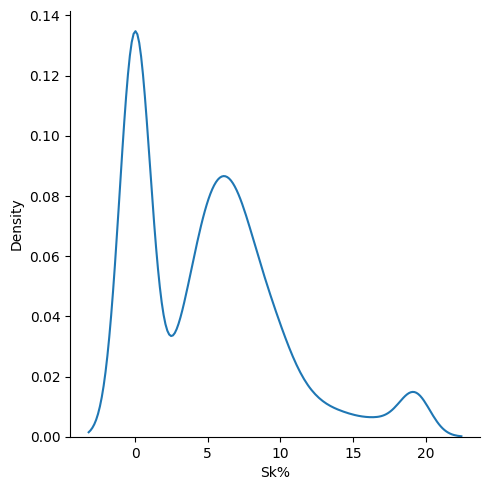

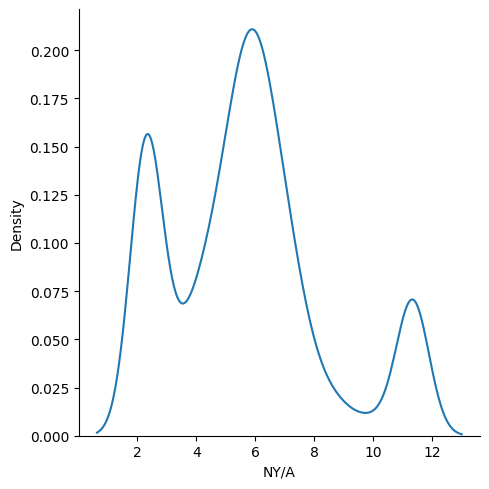

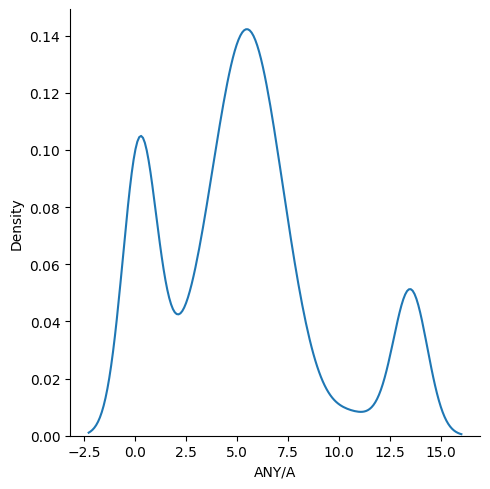

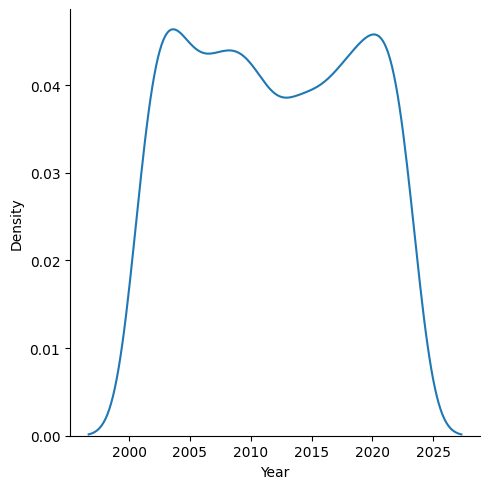

In [62]:
# Probability Distribution

import seaborn as sns
print("Probability Distribution")
for col in df.columns:
  if(df[col].dtypes !='O'):
    sns.displot(df[col],kind="kde")

# Outliers

**Before removing Outliers**

Outliers


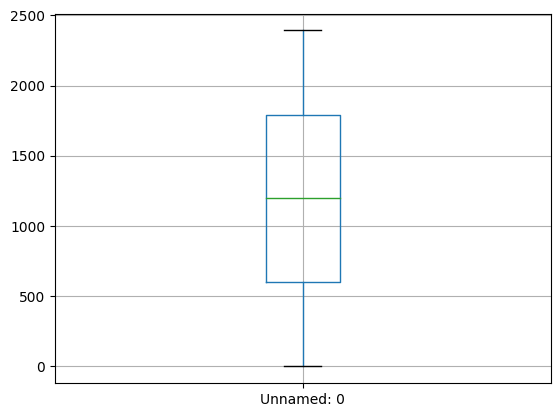

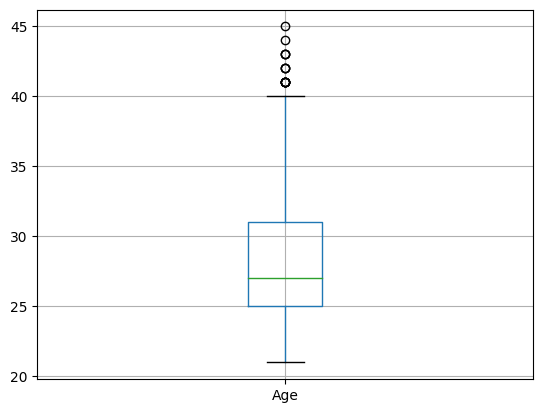

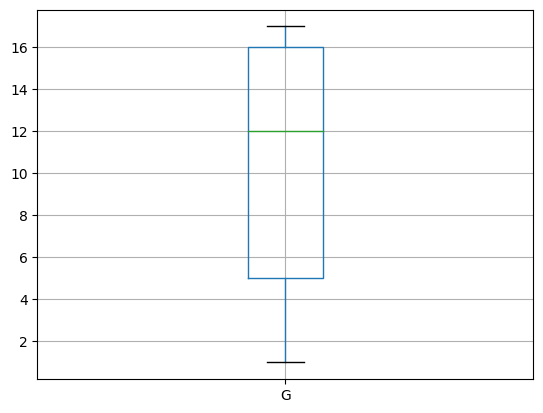

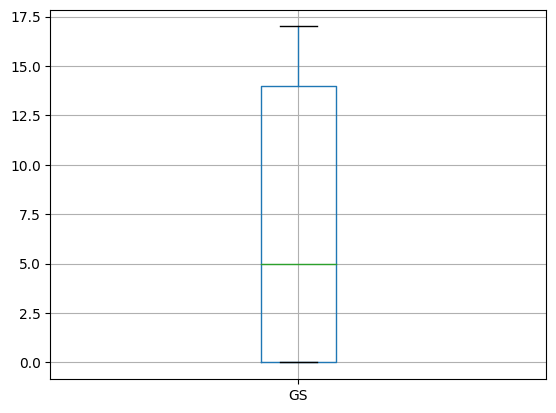

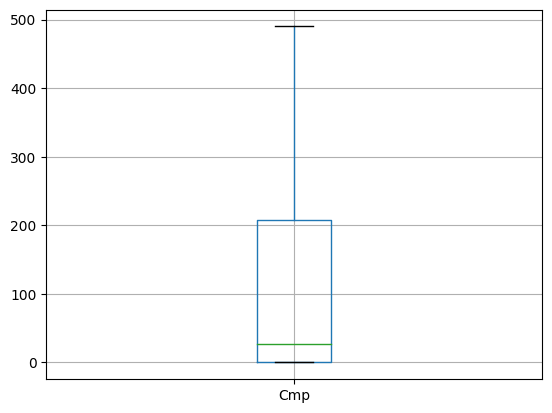

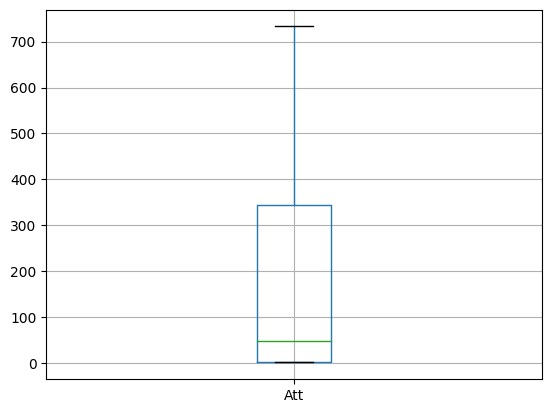

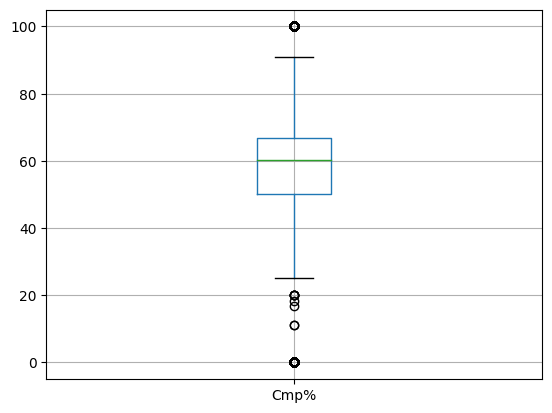

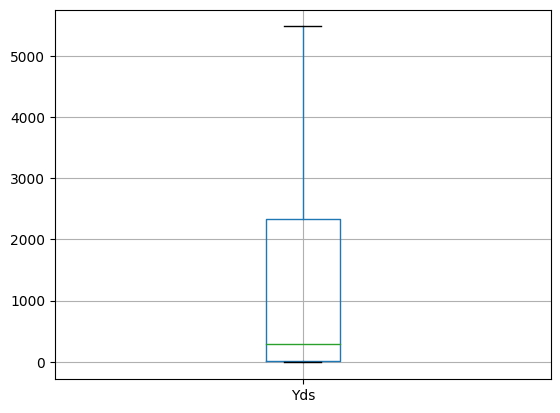

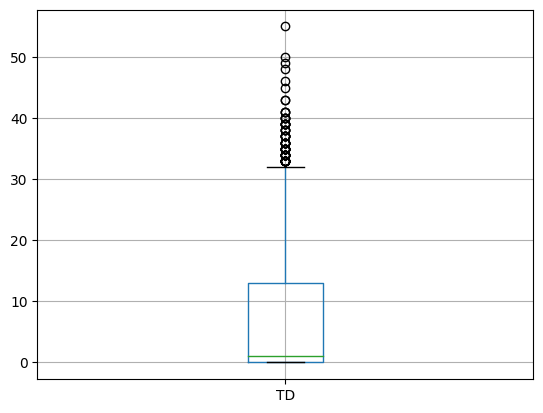

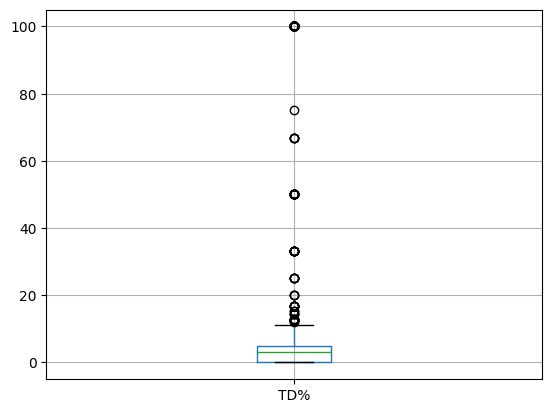

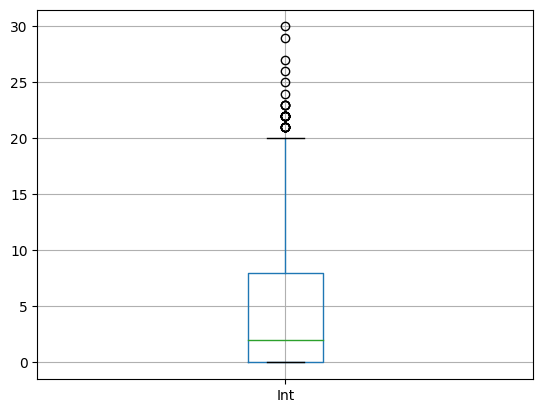

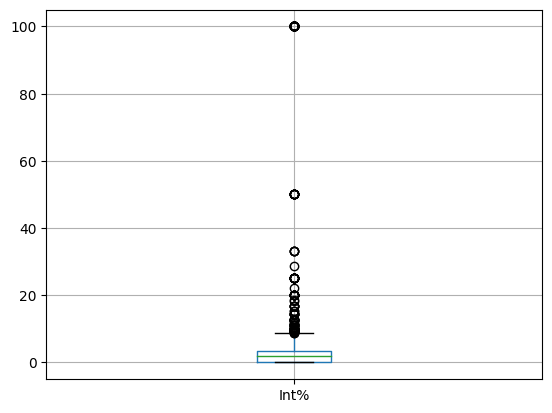

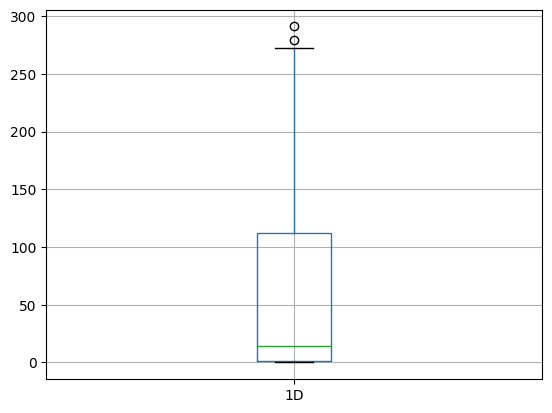

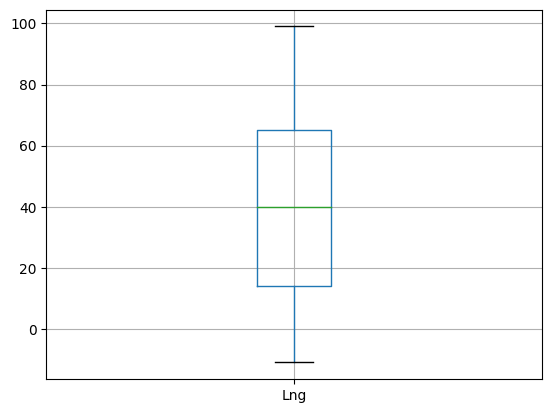

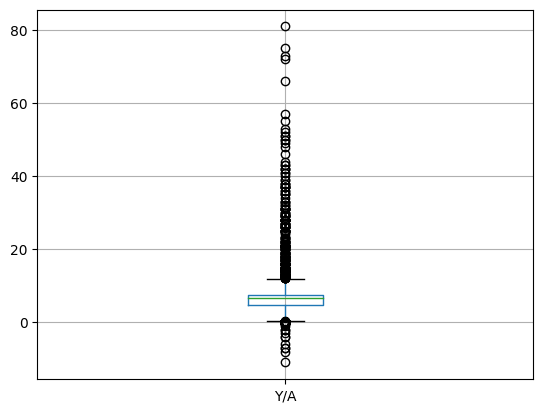

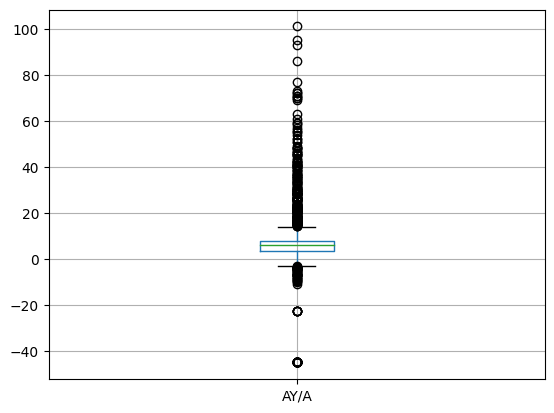

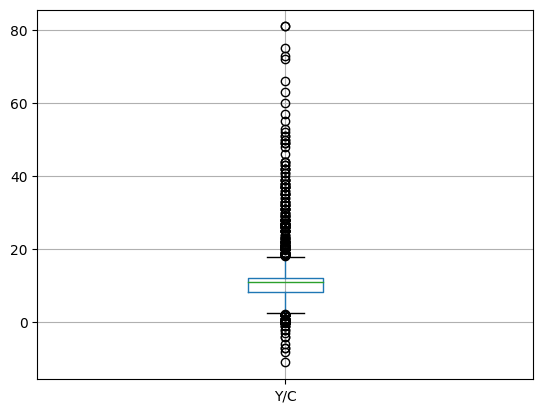

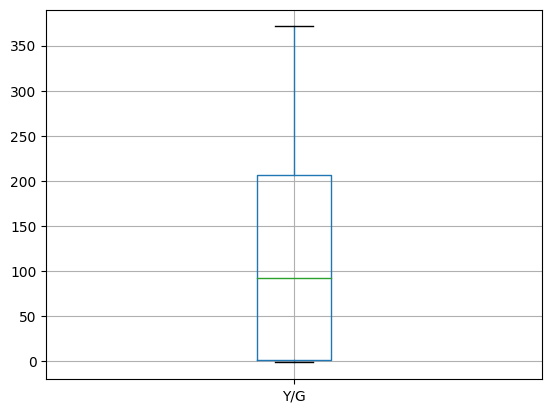

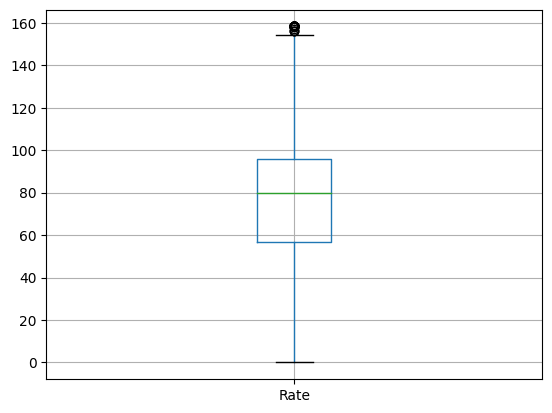

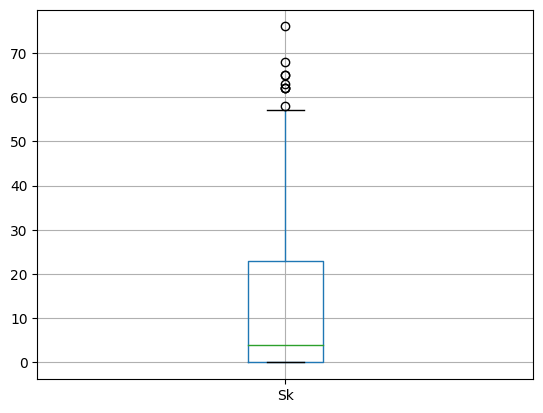

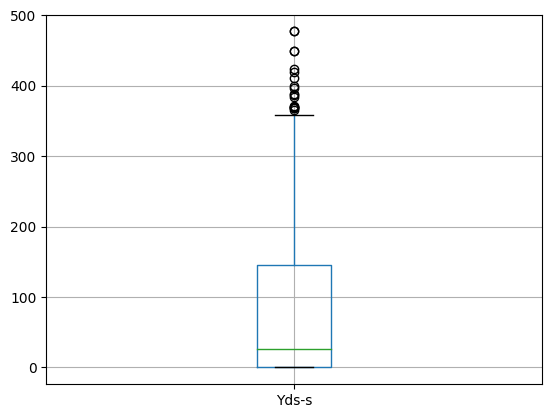

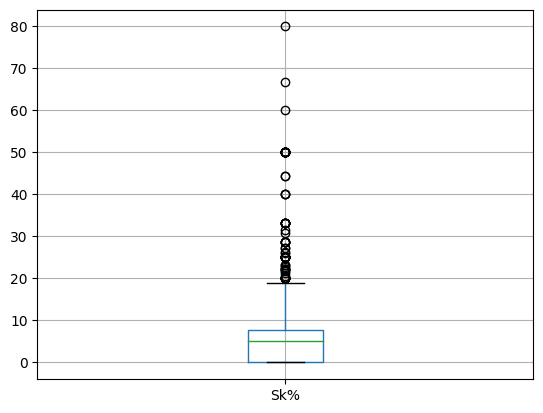

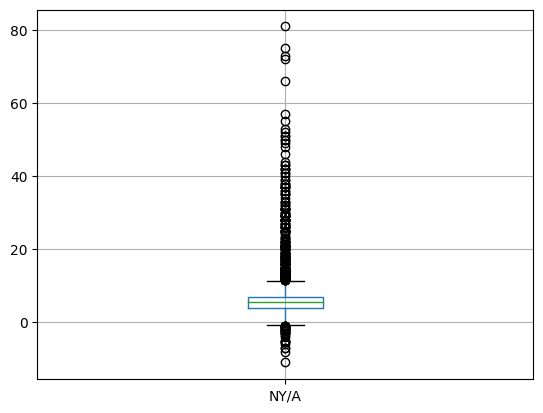

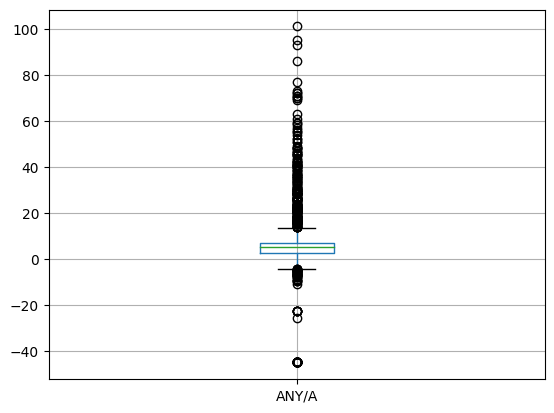

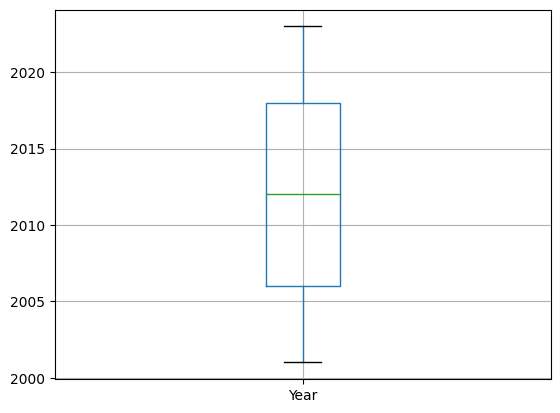

In [45]:
print("Outliers")
numeric=[]

for col in df.columns:
  if(df[col].dtypes !='O'):
    numeric.append(col)

for col in numeric:
  df.boxplot(column=col)
  plt.show()

In [46]:
df.head()

,Unnamed: 0,Player,Age,G,GS,Cmp,Att,Cmp%,Yds,TD,...,AY/A,Y/C,Y/G,Rate,Sk,Yds-s,Sk%,NY/A,ANY/A,Year
0,0,Kurt Warner,30,16,16,375,546,68.7,4830,36,...,8.4,12.9,301.9,101.4,38,233,6.5,7.87,7.41,2001
1,1,Peyton Manning,25,16,16,343,547,62.7,4131,26,...,6.6,12.0,258.2,84.1,29,232,5.0,6.77,5.88,2001
2,2,Brett Favre,32,16,16,314,510,61.6,3921,32,...,7.6,12.5,245.1,94.1,22,151,4.1,7.09,7.02,2001
3,3,Aaron Brooks,25,16,16,312,558,55.9,3832,26,...,6.0,12.3,239.5,76.4,50,330,8.2,5.76,4.99,2001
4,4,Rich Gannon,36,16,16,361,549,65.8,3828,27,...,7.2,10.6,239.3,95.5,27,155,4.7,6.38,6.61,2001


# Removing Outliers

In [47]:
#removing Outliers
for col in numeric :
 IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
 upper_bound = df[col].quantile(0.75) + (1.5 * IQR)
 lower_bound = df[col].quantile(0.75) - (1.5 * IQR)

 df.loc[df[col] > upper_bound , col] = upper_bound
 df.loc[df[col] < lower_bound , col] = lower_bound

**After** **removing** **Outliers**

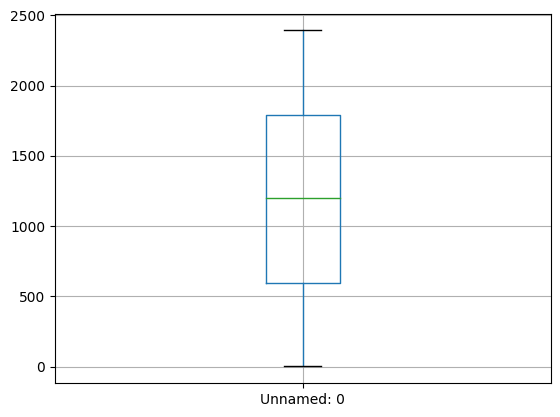

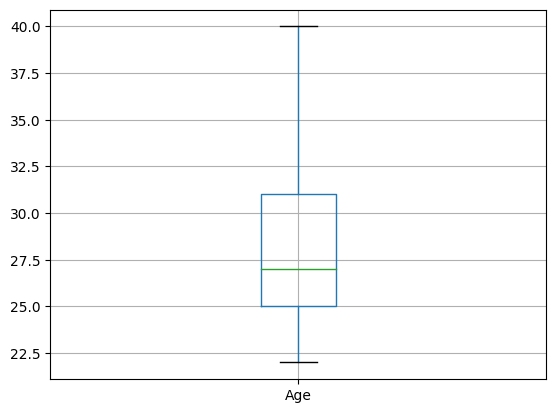

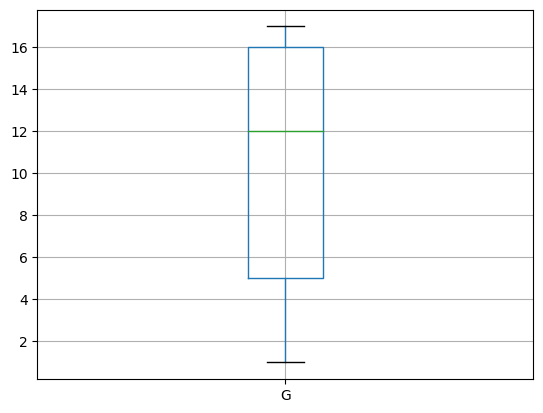

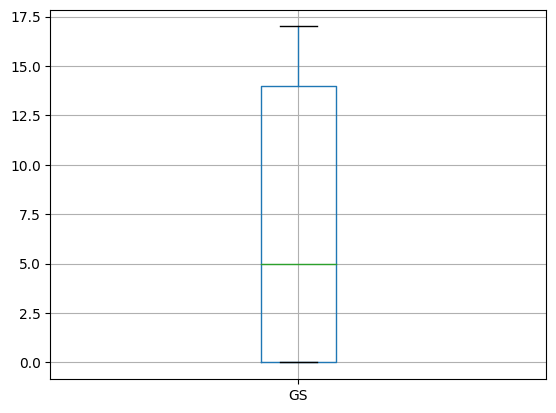

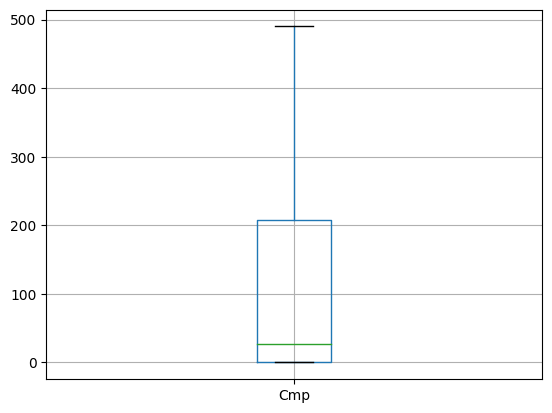

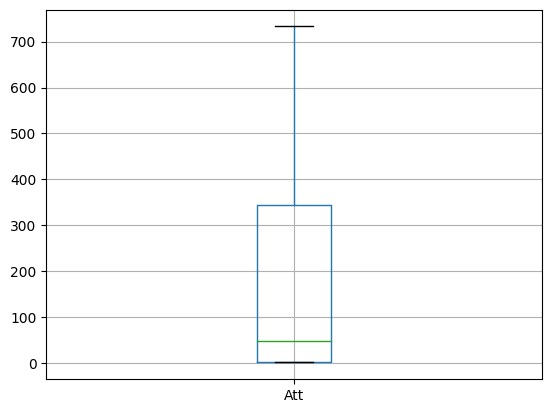

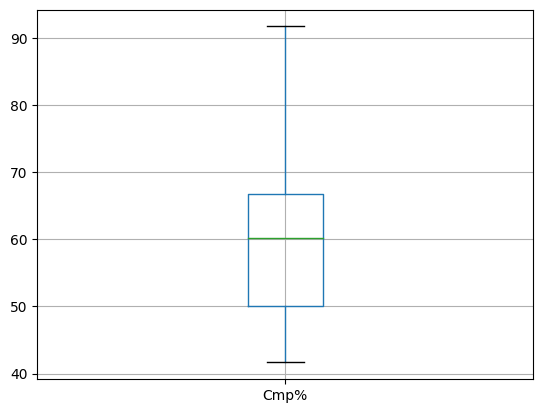

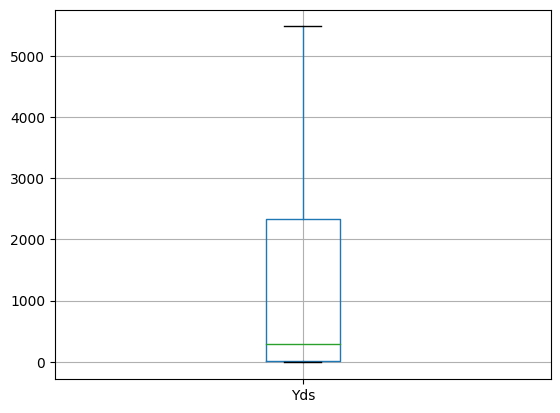

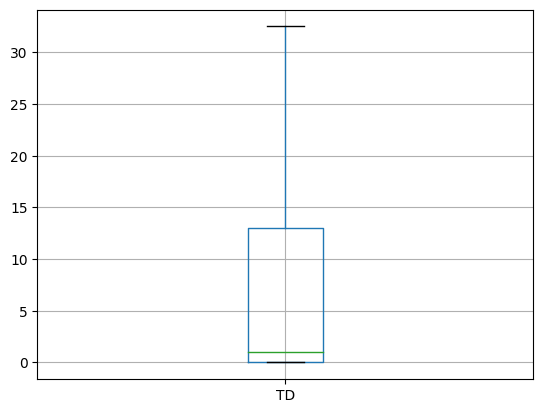

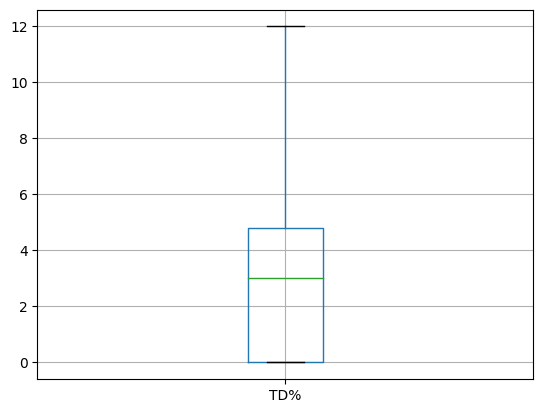

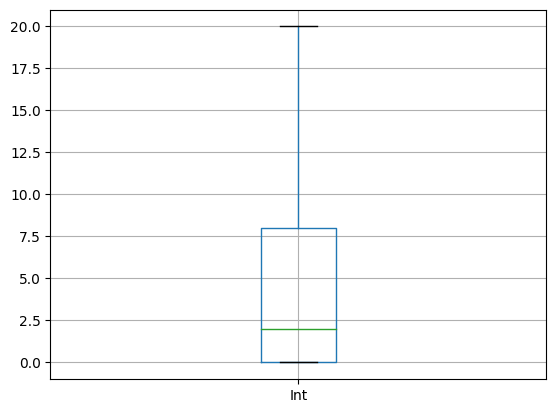

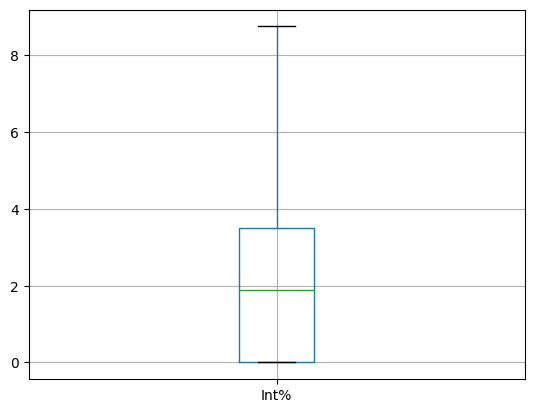

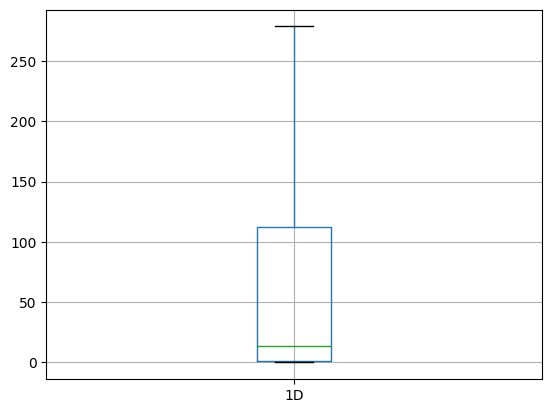

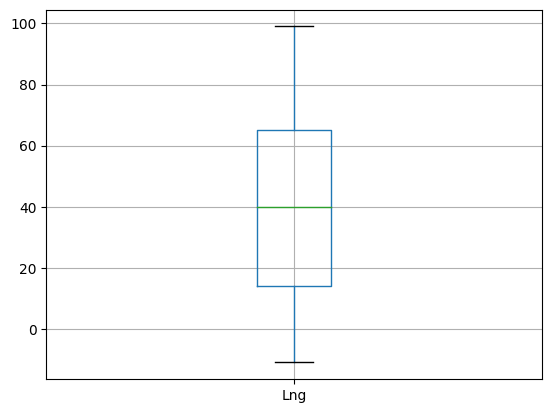

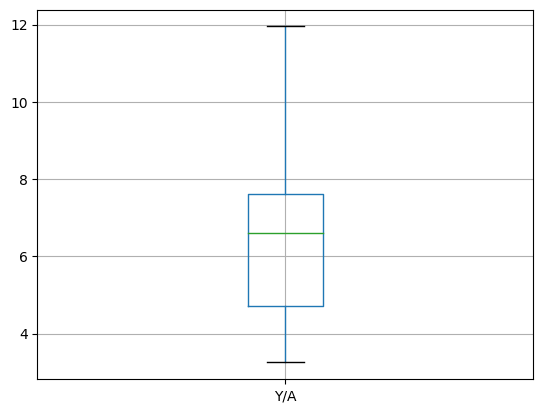

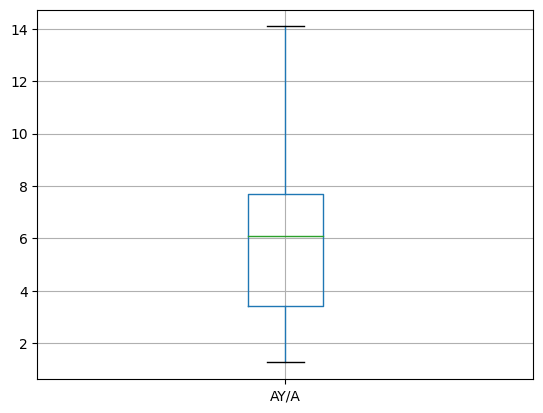

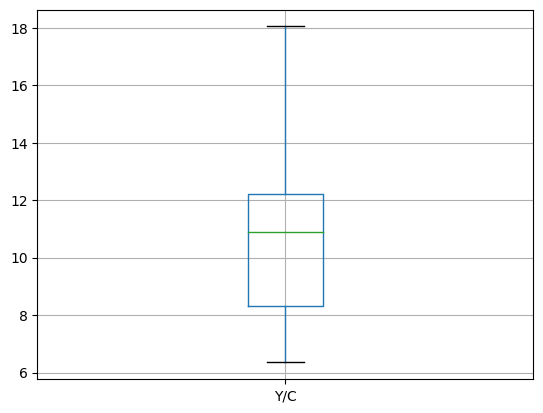

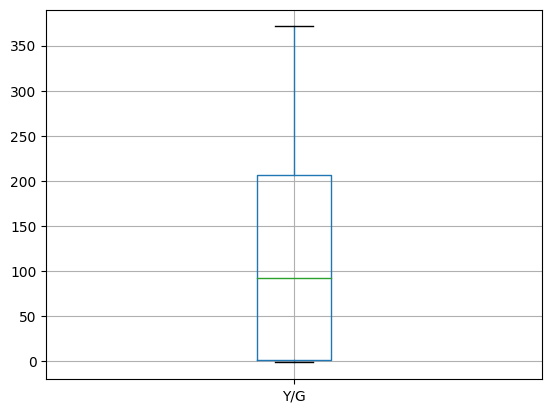

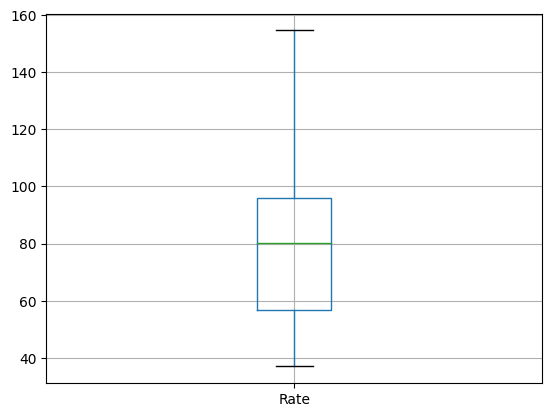

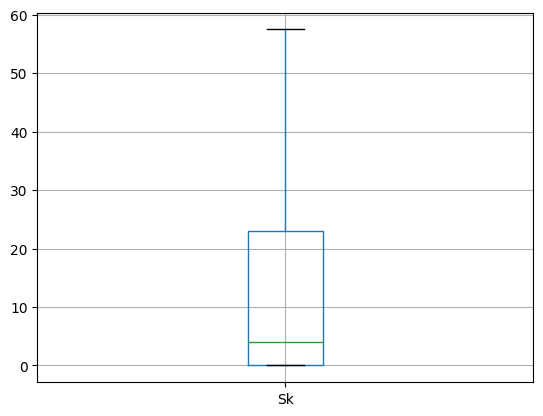

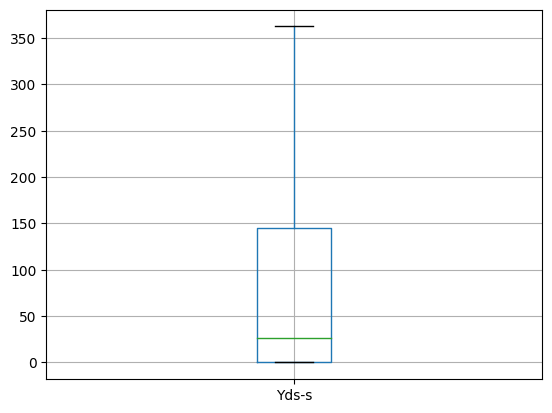

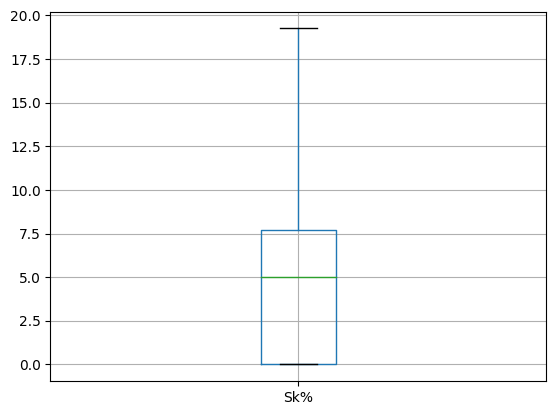

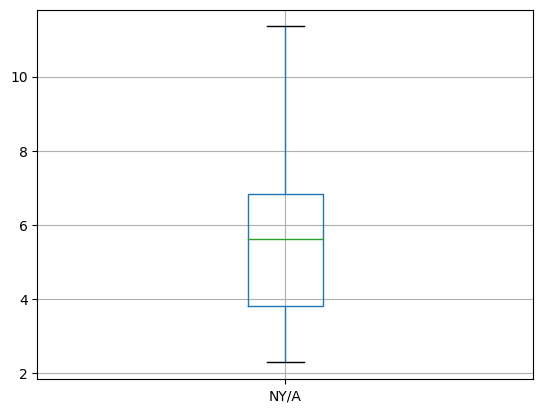

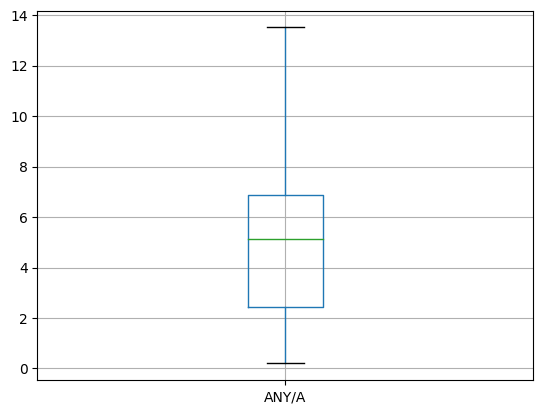

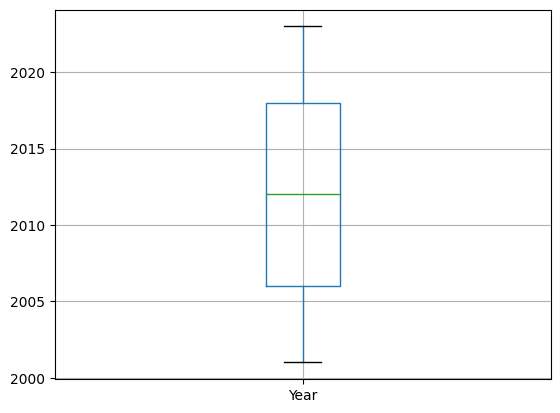

In [48]:

numeric=[]

for col in df.columns:
  if(df[col].dtypes !='O'):
    numeric.append(col)

for col in numeric:
  df.boxplot(column=col)
  plt.show()

In [49]:
df.columns

Index(['Unnamed: 0', 'Player', 'Age', 'G', 'GS', 'Cmp', 'Att', 'Cmp%', 'Yds',
       'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C', 'Y/G',
       'Rate', 'Sk', 'Yds-s', 'Sk%', 'NY/A', 'ANY/A', 'Year'],
      dtype='object')

# Data Preprocessing

In [50]:
y = df['Rate']
X=df.drop(["Unnamed: 0","Player","Year","Rate"],axis=1)

In [51]:
X.columns

Index(['Age', 'G', 'GS', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD', 'TD%', 'Int',
       'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Sk', 'Yds-s', 'Sk%',
       'NY/A', 'ANY/A'],
      dtype='object')

# Splitting dataset into training set and testing set

In [52]:
#Split Data
#80:20 split for training and testing the model
from sklearn import model_selection
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size = 0.2, random_state=42)

In [53]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 1.34, -0.42,  0.16, ...,  0.77,  0.01,  0.03],
       [ 0.65,  0.47,  0.94, ..., -0.05,  0.07,  0.08],
       [ 2.03, -1.66, -0.93, ...,  2.81, -1.29, -1.3 ],
       ...,
       [-1.2 ,  0.64, -0.93, ..., -1.02,  2.22,  2.18],
       [-0.27, -0.95, -0.93, ..., -0.03,  0.12,  0.03],
       [-0.04,  1.  ,  1.4 , ..., -0.05,  0.92,  0.82]])

# Fitting linear regression model into the training set

In [54]:
from sklearn.linear_model import LinearRegression
lin_reg_model = LinearRegression()
#Now we can fit the model to our dataset
lin_reg_model.fit(X_train,y_train)

LinearRegression()

# Prediction on Test data

In [55]:
# prediction on Test data
#predictions
X_test=np.array(X_test)
y_test=np.array(y_test)
y_pred = lin_reg_model.predict(X_test)
y_pred_array = np.array(y_pred)
y_test_array = np.array(y_test)

# Reshape arrays
y_pred_reshaped = y_pred_array.reshape(len(y_pred_array), 1)
y_test_reshaped = y_test_array.reshape(len(y_test_array), 1)

# Concatenate arrays along the second axis
concatenated_array = np.concatenate((y_pred_reshaped, y_test_reshaped), axis=1)

print(concatenated_array)

[[ 54.86  53.6 ]
 [ 79.17  79.5 ]
 [ 59.33  64.6 ]
 [ 79.17  83.9 ]
 [ 26.58  36.96]
 [ 77.31  77.5 ]
 [ 80.8   85.4 ]
 [ 74.87  75.3 ]
 [ 65.25  61.7 ]
 [ 70.88  70.6 ]
 [ 96.48  99.  ]
 [153.13 154.64]
 [ 49.25  56.2 ]
 [ 96.94  96.3 ]
 [ 28.74  36.96]
 [ 84.09  85.2 ]
 [ 41.16  36.96]
 [112.7  118.1 ]
 [ 41.73  39.6 ]
 [ 46.08  39.6 ]
 [ 97.09  97.  ]
 [ 74.89  80.2 ]
 [ 42.03  39.6 ]
 [ 86.43  84.3 ]
 [ 85.23  86.  ]
 [154.24 154.2 ]
 [105.3  104.7 ]
 [ 41.51  39.6 ]
 [ 26.22  36.96]
 [ 72.59  72.9 ]
 [ 70.2   70.7 ]
 [ 76.68  81.2 ]
 [ 66.1   70.8 ]
 [102.94 102.2 ]
 [ 69.43  68.9 ]
 [ 81.7   82.4 ]
 [122.   118.7 ]
 [ 85.7   85.9 ]
 [ 68.73  77.1 ]
 [ 94.41  95.4 ]
 [ 74.35  74.1 ]
 [ 80.54  81.5 ]
 [ 68.97  68.4 ]
 [105.2  106.  ]
 [109.37 104.2 ]
 [ 84.35  84.8 ]
 [ 90.24  89.6 ]
 [ 87.88  88.9 ]
 [ 96.78  96.1 ]
 [ 77.93  78.5 ]
 [ 90.52  89.4 ]
 [ 26.58  36.96]
 [ 46.98  39.6 ]
 [127.08 135.4 ]
 [ 90.5   90.2 ]
 [ 41.74  39.6 ]
 [ 66.63  66.6 ]
 [ 82.01  82.8 ]
 [126.99 129.2

# Plotting

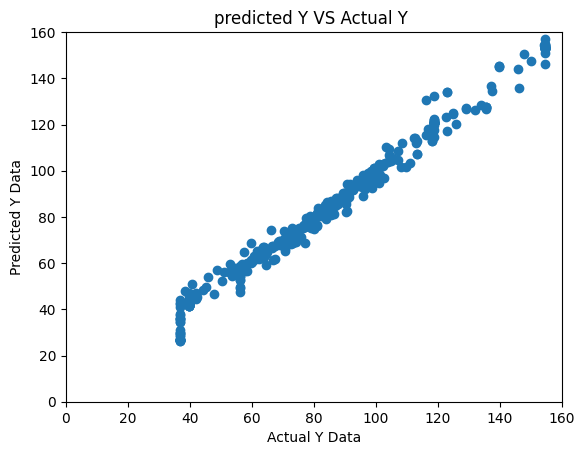

In [56]:
#plotting

plt.scatter(y_test,y_pred)
plt.axis([0,160,0,160])
plt.title("predicted Y VS Actual Y ")
plt.xlabel("Actual Y Data")
plt.ylabel("Predicted Y Data")
plt.show()

# Tuned weights

In [57]:
# Regressor coefficients and intercept
print(f'Coefficient: {lin_reg_model.coef_}')
print(f'Intercept: {lin_reg_model.intercept_}')

Coefficient: [ 0.04 -0.87 -0.13  3.37  1.05  9.23 -0.56  0.59  8.83 -2.93 -4.3  -0.23
  0.22  4.83  8.89 -1.04 -0.06  0.22 -0.08  0.5   2.58 -1.7 ]
Intercept: 78.5820545212766


# Testing Accuracy

In [58]:
#Testing Accuracy
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
x = lin_reg_model.score(X_test,y_test)
print("Accuracy = ",x * 100,"%")

Mean Squared Error: 13.417318084617404
Accuracy =  98.63041034467732 %
